# Імпорт модулів

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

# 0. Завантаження файлу даних

## Вихідна таблиця

In [262]:
df = pd.read_csv("bestsellers with categories.csv")
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


## Перші рядки

In [263]:
_.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Таблиця з перейменованими стовбчиками

In [264]:
df = df.rename(
    columns={
        "Name": "name",
        "Author": "author",
        "User Rating": "user_rating",
        "Reviews": "reviews",
        "Price": "price",
        "Year": "year",
        "Genre": "genre",
    }
)
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


# 1. Первинне дослідження даних

## Чи є в якихось змінних пропуски?

**Підказка**: виведіть кількість пропусків (`na`) у кожному зі стовпців (використовуйте функції `isna` та `sum`)


In [265]:
df.isna().sum(axis=0)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [266]:
print('Відповідь: ', ['Нема пропусків', 'Є пропуски'][int(_.all())])

Відповідь:  Нема пропусків


## Які є унікальні жанри?

**Підказка**: Перевірте, які є унікальні значення в колонці genre (використовуйте функцію `unique`)

In [267]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [268]:
print(*map(lambda el: el, _), sep='\n')

Non Fiction
Fiction


## Побудуйте діаграму розподілу цін

**Підказка**: використовуйте `kind='hist'`

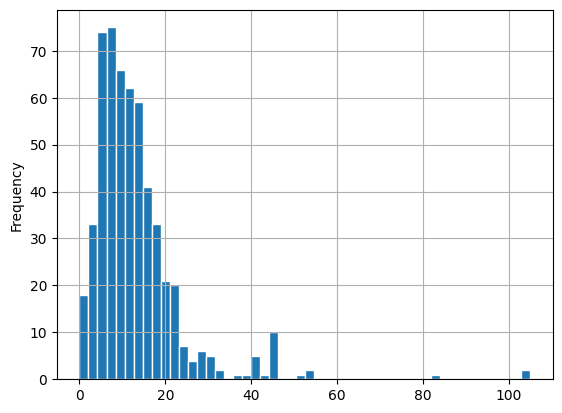

In [269]:
plot = df.price.plot(kind='hist', bins=50, edgecolor="white", grid=True)
plt.show()

## Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна.

**Підказка**: використовуйте функції `max`, `min`, `mean`, `median`

In [270]:
df.price

0       8
1      22
2      15
3       6
4      12
       ..
545     8
546     8
547     8
548     8
549     8
Name: price, Length: 550, dtype: int64

In [271]:
print(f"Max price: ", _.max())
print(f"Min price: ",  _.min())
print(f"Mean price: ",  _.mean())
print(f"Price median: ",  _.median())

Max price:  105
Min price:  0
Mean price:  13.1
Price median:  11.0


# 2. Пошук та сортування даних

## Який рейтинг у датасеті найвищий?

In [272]:
df.user_rating.max()

4.9

## Скільки книг мають такий рейтинг?

In [273]:
df.name[(df.user_rating == max_rating)].unique().size

28

## Яка книга має найбільше відгуків?

In [274]:
df[df.reviews == df.reviews.max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


## З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?

**Підказка**: можна використати проміжний датафрейм.

In [275]:
df[df.year == 2015].sort_values(by='user_rating', ascending=False)\
    .drop_duplicates(subset='name')\
    .iloc[:50]\
    .nlargest(1, 'price')

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


## Скільки книг жанру Fiction у 2010 році? 

**Умова**:  використовуйте `&`.

In [276]:
df[(df.year == 2010) & (df.genre == 'Fiction')].shape[0]

20

## Скільки книг з рейтингом `4.9` потрапило до рейтингу у 2010 та 2011 роках?

**Умова**: використовуйте `|` або функцію `isin`.

In [277]:
df[((df.year == 2010) | (df.year == 2011)) & (df.user_rating == 4.9)].shape[0]

1

## Відсортуйде за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів. Яка книга остання у відсортованому списку? 

**Підказка**: використовуйте функцію `sort_values`

In [278]:
df[(df.year == 2015) & (df.price < 8)].sort_values('price', ascending=False)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction


### Яка книга остання у відсортованому списку?

In [279]:
_.tail(1)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction


# 3. Агрегування даних та з'єднання таблиць

## Яка максимальна та мінімальна ціни для кожного з жанрів?

**Умова**: використовуйте функції  `groupby` та `agg`. Для підрахунку мінімальних та максимальних значень використовуйте `max` та `min`.

In [280]:
df.groupby('genre').agg(["min", "max"]).price

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [281]:
print("Max Price for Fiction: ", _.loc['Fiction']['max'])
print("Min Price for Fiction: ",  _.loc['Fiction']['min'])
print("Max Price for Non Fiction: ", _.loc['Non Fiction']['max'])
print("Min Price for Non Fiction: ",  _.loc['Non Fiction']['min'])

Max Price for Fiction:  82
Min Price for Fiction:  0
Max Price for Non Fiction:  105
Min Price for Non Fiction:  0


## Створіть датафрейм, який вміщатиме кількість книг для кожного з авторів 

**Умова**: використовуйте функції `groupby` та `agg`. Для підрахунку кількості використовуйте `count`. Не беріть усі стовпці, виберете тільки потрібні

In [282]:
df_author_books_count = df.groupby("author").agg(['count']).name
df_author_books_count.sort_values('count')

,count
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11


#### Який автор має найбільше книг? Скільки книг?

In [283]:
df_author_books_count.loc[df_author_books_count.idxmax()]

,count
author,
Jeff Kinney,12


## Створіть датафрейм, який буде вміщати середній рейтинг для кожного автора 

**Умова**: використовуйте функції `groupby` та `agg`, для підрахунку середнього значення використовуйте `mean`. Не беріть усі стовпці, виберете тільки потрібні

In [284]:
df_author_rating_avg = df.groupby("author").user_rating.agg(['mean'])
df_author_rating_avg.sort_values('mean', ascending=False)

,mean
author,
Patrick Thorpe,4.9
Lin-Manuel Miranda,4.9
Chip Gaines,4.9
Sherri Duskey Rinker,4.9
Nathan W. Pyle,4.9
...,...
Paula Hawkins,4.1
Muriel Barbery,4.0
Gillian Flynn,4.0


### У якого автора середній рейтинг мінімальний? Який у цього автора середній рейтинг? 

In [285]:
df_author_rating_avg.loc[df_author_rating_avg.idxmin()]

,mean
author,
Donna Tartt,3.9


## З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг 

**Підказка**: використовуйте функцію concat з параметром `axis=1`. 

**Умова**: Збережіть результат у змінну

In [289]:
df_authors = pd.concat([df_author_books_count, df_author_rating_avg], axis=1)\
    .rename(columns={"mean": "average_rating", "count": "books_count"})\
    .reset_index()
df_authors['average_rating'] = df_authors['average_rating'].round(2)
df_authors

## Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом
**Підказка**: використовуйте функцію `sort_values`.

In [287]:
df_authors.sort_values(by=["books_count", "average_rating"], 
                       ascending=False, 
                       inplace=True)

### Який автор перший у списку?

In [288]:
_.head(1)

,author,books_count,average_rating
120,Jeff Kinney,12,4.8


# 4. Візуалізація даних